# Census income prediction 

Predicting income based on various features to be <= $50 K or >$50 K . 

In [100]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [101]:
original_data = pd.read_csv("censusincome.csv")
original_data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Data Preprocessing 

In [102]:
original_data.head(50)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [103]:
# this dataset contains som values with '?' sign need to replace with nan 
original_data = original_data.replace('?',np.nan)

In [104]:
original_data.isnull().sum()
# now we can see that workclass,occupation,native.country has sonme missing values.

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [105]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [106]:
missingvalues = ['workclass','occupation','native.country']

In [107]:
# filling the missing values 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent')
original_data[missingvalues] = imputer.fit_transform(original_data[missingvalues])

In [108]:
original_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [109]:
original_data.drop(columns=['race'],axis=1,inplace=True)

In [110]:
# for visulisation purpose cleaned data set will be used
# then after visualization respective variables will be changed to 1 and 0
# original_data.to_csv(r'M:\Study College\TY-Btech-2021\Subjects\BDAL\MP\censusincomevisuals.csv')

In [111]:
original_data.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


Categorical and Numerical Data Separation

In [112]:
print("Numerical columns")
Numerical= original_data.select_dtypes('int64').keys()
for i in Numerical:
    print(i)
print()
print("Categorical columns")
Categorical = original_data.select_dtypes('object').keys()
for i in Categorical:
    print(i)
print()
print("Target Variable")
print("Income")

Numerical columns
age
fnlwgt
education.num
capital.gain
capital.loss
hours.per.week

Categorical columns
workclass
education
marital.status
occupation
relationship
sex
native.country
income

Target Variable
Income


In [113]:
# statistics for numerical columns 
original_data[Numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [114]:
# converting some features to binary representations
# for gender
genderbin = {"Male":1,"Female":0}
original_data['sex']=original_data['sex'].map(genderbin)

In [115]:
# for income
incomebin = {"<=50K":0,">50K":1}
original_data['income'] = original_data['income'].map(incomebin)

In [116]:
original_data.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,0,40,Cuba,0


In [117]:
original_data.corr()

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,income
age,1.000000,-0.076646,0.036527,0.088832,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.026858,0.000432,-0.010252,-0.018768,-0.009463
education.num,0.036527,-0.043195,1.000000,0.012280,0.122630,0.079923,0.148123,0.335154
sex,0.088832,0.026858,0.012280,1.000000,0.048480,0.045567,0.229309,0.215980
capital.gain,0.077674,0.000432,0.122630,0.048480,1.000000,-0.031615,0.078409,0.223329
capital.loss,0.057775,-0.010252,0.079923,0.045567,-0.031615,1.000000,0.054256,0.150526
hours.per.week,0.068756,-0.018768,0.148123,0.229309,0.078409,0.054256,1.000000,0.229689
income,0.234037,-0.009463,0.335154,0.215980,0.223329,0.150526,0.229689,1.000000


In [118]:
original_data.select_dtypes('object').keys()

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'native.country'],
      dtype='object')

In [119]:
# for i in original_data.select_dtypes('object').keys():
#     fig = plt.figure(figsize=(30,10))
#     sns.countplot(i, hue='income', data=original_data)
#     plt.tight_layout()
#     plt.show()

In [120]:
original_data = original_data[original_data['native.country']=='United-States']

In [121]:
original_data.drop(columns=['native.country','fnlwgt','education'],inplace=True)
# native.country only this dataset has significant amount of information of us
# fnlwgt has negative correlation with income
# education.num and education are same only encoding is done

In [122]:
# original_data = pd.get_dummies(original_data,columns=["workclass", "education", "marital.status", "occupation","relationship"])
# original_data
encodings = {}

for lst in ['workclass','marital.status', 'occupation', 'relationship'] :
    tonum = {}
    setlst = list(original_data[lst].unique())
    for i in range(len(setlst)) :
        tonum[setlst[i]] = i
    original_data[lst].replace(tonum, inplace = True)
    encodings[lst] = tonum
    
print(encodings)

{'workclass': {'State-gov': 0, 'Self-emp-not-inc': 1, 'Private': 2, 'Federal-gov': 3, 'Local-gov': 4, 'Self-emp-inc': 5, 'Without-pay': 6, 'Never-worked': 7}, 'marital.status': {'Never-married': 0, 'Married-civ-spouse': 1, 'Divorced': 2, 'Separated': 3, 'Married-AF-spouse': 4, 'Married-spouse-absent': 5, 'Widowed': 6}, 'occupation': {'Adm-clerical': 0, 'Exec-managerial': 1, 'Handlers-cleaners': 2, 'Prof-specialty': 3, 'Sales': 4, 'Craft-repair': 5, 'Farming-fishing': 6, 'Machine-op-inspct': 7, 'Other-service': 8, 'Transport-moving': 9, 'Tech-support': 10, 'Protective-serv': 11, 'Armed-Forces': 12, 'Priv-house-serv': 13}, 'relationship': {'Not-in-family': 0, 'Husband': 1, 'Wife': 2, 'Own-child': 3, 'Unmarried': 4, 'Other-relative': 5}}


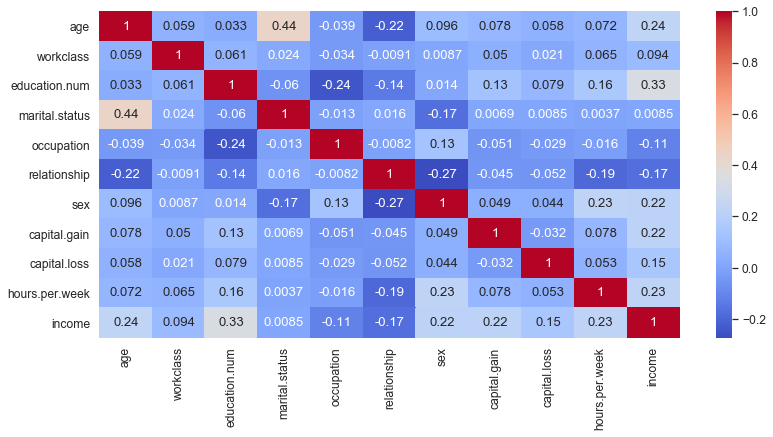

In [123]:
sns.set(rc={'figure.figsize':(13,6)}, font_scale=1.1)
sns.heatmap(original_data.corr(),annot=True,cmap='coolwarm')

In [124]:
# original_data.drop(columns = ['marital.status','relationship'], inplace = True)

#  Training The model

In [125]:
original_data.head()

,age,workclass,education.num,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,income
0,39,0,13,0,0,0,1,2174,0,40,0
1,50,1,13,1,1,1,1,0,0,13,0
2,38,2,9,2,2,0,1,0,0,40,0
3,53,2,7,1,2,1,1,0,0,40,0
5,37,2,14,1,1,2,0,0,0,40,0


In [126]:
original_data.dtypes

age               int64
workclass         int64
education.num     int64
marital.status    int64
occupation        int64
relationship      int64
sex               int64
capital.gain      int64
capital.loss      int64
hours.per.week    int64
income            int64
dtype: object

In [127]:
# train test split
X = original_data.iloc[:, :-1]
Y = original_data.iloc[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [128]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

predict_dtc = dtc.predict(X_test)

print('Decision Tree Classifier :', accuracy_score(Y_test, predict_dtc) * 100)

Decision Tree Classifier : 81.51571164510166


In [129]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

predict_lr = lr.predict(X_test)

print('Logistic Regression :', accuracy_score(Y_test, predict_lr) * 100)

Logistic Regression : 78.9279112754159


C:\Users\Amit__Zope\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [130]:
rfc = RandomForestClassifier(n_estimators = 500)
rfc.fit(X_train, Y_train)

predict_rfc= rfc.predict(X_test)

print('Random Forest Classifier :', accuracy_score(Y_test, predict_rfc) * 100)

Random Forest Classifier : 84.67484456393883


In [131]:
# training accuracies
# for DTC
predict_train_dtc = dtc.predict(X_train)
train_acc_dtc = accuracy_score(Y_train,predict_train_dtc)
print("Training Accuracy For Decision Tree : " , train_acc_dtc*100)
# for lr
predict_train_lr = lr.predict(X_train)
train_acc_lr = accuracy_score(Y_train,predict_train_lr)
print("Training Accuracy For Logistic Regression : " ,train_acc_lr*100)
# for rfc
predict_train_rfc = rfc.predict(X_train)
train_acc_rfc = accuracy_score(Y_train,predict_train_rfc)
print("Training Accuracy For Random Forest Classifier : " , train_acc_rfc*100)

Training Accuracy For Decision Tree :  97.31535165112174
Training Accuracy For Logistic Regression :  79.61095706243174
Training Accuracy For Random Forest Classifier :  97.31535165112174


In [132]:
results = {'Method':['Decision Tree Classifier','Logistic Regression','Random Forest Classifier'],
           'Training Accuracy':[train_acc_dtc*100,train_acc_lr*100,train_acc_rfc*100],
           'Testing Accuracy Score':[accuracy_score(Y_test, predict_dtc) * 100,
                                     accuracy_score(Y_test, predict_lr) * 100,
                                    accuracy_score(Y_test, predict_rfc) * 100]}
final_view = pd.DataFrame(results)
final_view

,Method,Training Accuracy,Testing Accuracy Score
0,Decision Tree Classifier,97.315352,81.515712
1,Logistic Regression,79.610957,78.927911
2,Random Forest Classifier,97.315352,84.674845
